In [1]:
import os
import cv2
import urllib
import numpy as np
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from layers import *
from activations import *
from metrics import *
from optimizers import *
from model import Model

In [2]:
# URL = "https://nnfs.io/datasets/fashion_mnist_images.zip"
# FILE = "fashion_mnist_images.zip"
# FOLDER = "fashion_mnist_images"

# if not os.path.isfile(FILE):
#     print(f'Downloading {URL} and saving as {FILE}...')
#     urllib.request.urlretrieve(URL, FILE)

# print('Unzipping images...')
# with ZipFile(FILE) as zip_images:
#     zip_images.extractall(FOLDER)

In [3]:
def load_mnist_dataset(dataset, path):
    labels = os.listdir(os.path.join(path, dataset))
    X = []
    y = []
    
    for label in labels:
        for file in os.listdir(os.path.join(path, dataset, label)):
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)            
            X.append(image)
            y.append(label)
    
    return np.array(X), np.array(y).astype('uint8')

def create_data_mnist(path):
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    X_valid, y_valid = load_mnist_dataset('valid', path)
    
    return X, y, X_test, y_test, X_valid, y_valid

In [4]:
X, y, X_test, y_test, X_valid, y_valid = create_data_mnist('fashion_mnist_images')

In [5]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [6]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5
X_valid = (X_valid.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(50000, 28, 28)


In [7]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)

Class: 1


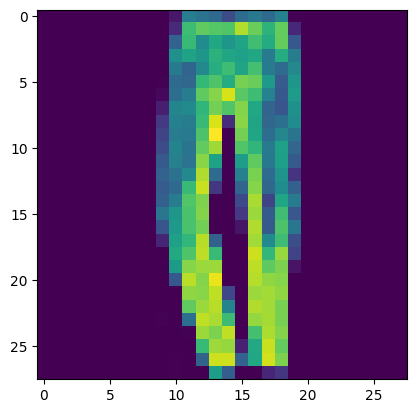

In [8]:
c = 0

print("Class:", y[c])
plt.imshow((X[c].reshape(28, 28)))
plt.show()

In [9]:
model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-4),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X,
    y, 
    validation_data=(X_valid, y_valid),
    epochs=10, 
    batch_size=128, 
    print_every=100
)

epoch: 1
    step: 0, acc: 0.039, loss: 3.575 (data_loss: 3.575,reg_loss: 0.000), lr: 0.001
    step: 100, acc: 0.695, loss: 0.791 (data_loss: 0.791,reg_loss: 0.000), lr: 0.0009900990099009901
    step: 200, acc: 0.781, loss: 0.539 (data_loss: 0.539,reg_loss: 0.000), lr: 0.000980392156862745
    step: 300, acc: 0.812, loss: 0.570 (data_loss: 0.570,reg_loss: 0.000), lr: 0.0009708737864077671
    step: 390, acc: 0.900, loss: 0.324 (data_loss: 0.324,reg_loss: 0.000), lr: 0.0009624639076034649
training, acc: 0.766, loss: 0.654 (data_loss: 0.654, reg_loss: 0.000), lr: 0.0009624639076034649
validation, acc: 0.842,loss: 0.430

epoch: 2
    step: 0, acc: 0.773, loss: 0.505 (data_loss: 0.505,reg_loss: 0.000), lr: 0.0009623712828409201
    step: 100, acc: 0.820, loss: 0.507 (data_loss: 0.507,reg_loss: 0.000), lr: 0.0009531979792202842
    step: 200, acc: 0.812, loss: 0.383 (data_loss: 0.383,reg_loss: 0.000), lr: 0.0009441979038806535
    step: 300, acc: 0.852, loss: 0.414 (data_loss: 0.414,reg_l

In [10]:
model.evaluate(X_test, y_test) # Use test set

Evaluation, acc: 0.877, loss: 0.350


In [11]:
model.save("model.m")
model = Model.load("model.m")

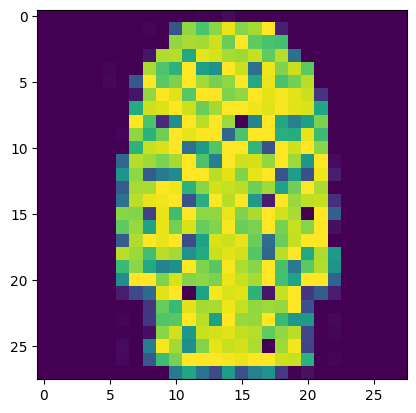

Prediction: 4, True: 4
Coat


In [22]:
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

img = 131

plt.imshow((X_test[img].reshape(28, 28)))
plt.show()

prediction = model.predict(X_test[img])[0] # Pass image(s) in array
print(f"Prediction: {prediction}, True: {y_test[img]}")

print(fashion_mnist_labels[prediction])